In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from IPython.display import display
import itertools, time, os, pickle, json, tempfile
import netket as nk
import seaborn as sns

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


plt.rc('figure', dpi=150)



```(relative, 0.05)``` implies $ R^{emp}(f_{N^*}) \approx 1 - (0.95)Acc(f^*) $ w.h.p


```(margin, 0.5) ``` implies  $ R^{emp}(f_{N^*}) \approx R_{0.5}^{emp}(f^*) $ w.h.p

In [20]:

with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
    data = pd.DataFrame.from_dict(data, orient = 'index') 
    data.index = pd.MultiIndex.from_tuples(data.index,  names=['kernel,dataset', 'm_train', 'Remp_eps', 'C'])

data = data.sort_values(["m_train"])
data

,,,,N_star,emp_risk,C_val
"kernel,dataset",m_train,Remp_eps,C,,,
"(Angle, Checkerboard)",60,"(margin, 0.5)",1/sqrt(m),2.000000,0.450000,0.129099
"(QAOA, Generated)",60,"(margin, 0.5)",optimal,644.000000,0.000000,2.257823
"(Havliscek, Two_Moons)",60,"(margin, 0.5)",5,537.000000,0.183333,5.000000
"(QAOA, Generated)",60,"(relative, 0.05)",1/sqrt(m),2.000000,0.493333,0.129099
"(Circ-Hubr, Two_Moons)",60,"(margin, 0.5)",optimal,216.000000,0.266667,2.461565
...,...,...,...,...,...,...
"(Circ-Hubr, Checkerboard)",120,"(relative, 0.05)",5,2.000000,0.604167,5.000000
"(QAOA, Two_Moons)",120,"(relative, 0.05)",1/sqrt(m),135.263636,0.184583,0.091287
"(QAOA, Checkerboard)",120,"(margin, 0.5)",1,2.000000,0.583333,1.000000


In [22]:
d1 = data.loc[:,[120],[("relative", 0.05)],["optimal"]] 
d1.sort_values(["emp_risk"])

,,,,N_star,emp_risk,C_val
"kernel,dataset",m_train,Remp_eps,C,,,
"(QAOA, Generated)",120,"(relative, 0.05)",optimal,394.333333,0.050000,1.231803
"(Circ-Hubr, Generated)",120,"(relative, 0.05)",optimal,858.000000,0.050000,2.251361
"(Angle, Generated)",120,"(relative, 0.05)",optimal,394.333333,0.050000,2.047449
"(Havliscek, Generated)",120,"(relative, 0.05)",optimal,406.222222,0.050000,1.435714
"(QAOA, Two_Moons)",120,"(relative, 0.05)",optimal,187.659459,0.065833,0.416156
"(Circ-Hubr, Two_Moons)",120,"(relative, 0.05)",optimal,2271.400000,0.145000,3.270918
"(Havliscek, Two_Moons)",120,"(relative, 0.05)",optimal,1575.575000,0.152917,5.310034
"(Angle, Two_Moons)",120,"(relative, 0.05)",optimal,633.300000,0.176667,4.494388
"(Havliscek, Checkerboard)",120,"(relative, 0.05)",optimal,2.000000,0.501250,0.008333


In [4]:
d1 = data.loc[:,[120],[("relative", 0.05)],["1/sqrt(m)"]] 
d1.sort_values(["emp_risk"])

,,,,N_star,emp_risk
"kernel,dataset",m_train,Remp_eps,C,,
"(QAOA, Two_Moons)",120,"(relative, 0.05)",1/sqrt(m),135.263636,0.184583
"(Havliscek, Two_Moons)",120,"(relative, 0.05)",1/sqrt(m),4.140000,0.216250
"(Angle, Two_Moons)",120,"(relative, 0.05)",1/sqrt(m),76.900000,0.224167
"(Circ-Hubr, Two_Moons)",120,"(relative, 0.05)",1/sqrt(m),124.563636,0.255833
"(QAOA, Generated)",120,"(relative, 0.05)",1/sqrt(m),2.000000,0.485417
"(Havliscek, Generated)",120,"(relative, 0.05)",1/sqrt(m),2.000000,0.485417
"(Circ-Hubr, Generated)",120,"(relative, 0.05)",1/sqrt(m),2.000000,0.493333
"(Havliscek, Checkerboard)",120,"(relative, 0.05)",1/sqrt(m),2.000000,0.501250
"(QAOA, Checkerboard)",120,"(relative, 0.05)",1/sqrt(m),2.000000,0.501250


In [5]:
d1 = data.loc[:,[120],[("margin", 0.5)],["1/sqrt(m)"]] 
d1.sort_values(["emp_risk"])

,,,,N_star,emp_risk
"kernel,dataset",m_train,Remp_eps,C,,
"(Havliscek, Two_Moons)",120,"(margin, 0.5)",1/sqrt(m),2.0,0.316667
"(Angle, Two_Moons)",120,"(margin, 0.5)",1/sqrt(m),2.0,0.316667
"(QAOA, Two_Moons)",120,"(margin, 0.5)",1/sqrt(m),2.0,0.366667
"(Havliscek, Generated)",120,"(margin, 0.5)",1/sqrt(m),216.0,0.458333
"(Circ-Hubr, Two_Moons)",120,"(margin, 0.5)",1/sqrt(m),2.0,0.466667
"(QAOA, Checkerboard)",120,"(margin, 0.5)",1/sqrt(m),2.0,0.475000
"(Havliscek, Checkerboard)",120,"(margin, 0.5)",1/sqrt(m),2.0,0.475000
"(Angle, Checkerboard)",120,"(margin, 0.5)",1/sqrt(m),2.0,0.475000
"(Circ-Hubr, Checkerboard)",120,"(margin, 0.5)",1/sqrt(m),2.0,0.475000


In [6]:
d1 = data.loc[:,[120],[("margin", 0.5)],[1]] 
d1.sort_values(["emp_risk"])

,,,,N_star,emp_risk
"kernel,dataset",m_train,Remp_eps,C,,
"(QAOA, Two_Moons)",120,"(margin, 0.5)",1,203.411765,0.041667
"(Circ-Hubr, Generated)",120,"(margin, 0.5)",1,195.619048,0.166667
"(Havliscek, Two_Moons)",120,"(margin, 0.5)",1,180.333333,0.200000
"(Angle, Two_Moons)",120,"(margin, 0.5)",1,175.875000,0.216667
"(Circ-Hubr, Two_Moons)",120,"(margin, 0.5)",1,160.971429,0.250000
"(Angle, Checkerboard)",120,"(margin, 0.5)",1,2.000000,0.475000
"(Havliscek, Checkerboard)",120,"(margin, 0.5)",1,2.000000,0.475000
"(Circ-Hubr, Checkerboard)",120,"(margin, 0.5)",1,2.000000,0.475000
"(QAOA, Checkerboard)",120,"(margin, 0.5)",1,2.000000,0.583333


In [7]:
d1 = data.loc[:,[120],[("relative", 0.05)],[5]] 
d1.sort_values(["emp_risk"])

,,,,N_star,emp_risk
"kernel,dataset",m_train,Remp_eps,C,,
"(Angle, Generated)",120,"(relative, 0.05)",5,537.000000,0.050000
"(QAOA, Two_Moons)",120,"(relative, 0.05)",5,399.428571,0.050000
"(Circ-Hubr, Two_Moons)",120,"(relative, 0.05)",5,2957.000000,0.145000
"(Havliscek, Two_Moons)",120,"(relative, 0.05)",5,895.450000,0.152917
"(Angle, Two_Moons)",120,"(relative, 0.05)",5,843.733333,0.176667
"(Angle, Checkerboard)",120,"(relative, 0.05)",5,2.000000,0.501250
"(Havliscek, Checkerboard)",120,"(relative, 0.05)",5,2.000000,0.501250
"(QAOA, Checkerboard)",120,"(relative, 0.05)",5,2.000000,0.596250
"(Circ-Hubr, Checkerboard)",120,"(relative, 0.05)",5,2.000000,0.604167


In [8]:
data

N_star  \
kernel,dataset            m_train Remp_eps         C                       
(Circ-Hubr, Checkerboard) 60      (margin, 0.5)    1            2.000000   
                                                   1/sqrt(m)    2.000000   
                                  (relative, 0.05) 1            2.000000   
(Havliscek, Two_Moons)    60      (margin, 0.5)    5          537.000000   
(QAOA, Two_Moons)         60      (margin, 0.5)    1          207.440000   
...                                                                  ...   
(Circ-Hubr, Two_Moons)    120     (margin, 0.5)    1/sqrt(m)    2.000000   
(Havliscek, Two_Moons)    120     (relative, 0.05) 1/sqrt(m)    4.140000   
(Circ-Hubr, Two_Moons)    120     (relative, 0.05) 1          214.777143   
(Havliscek, Checkerboard) 120     (relative, 0.05) 5            2.000000   
(Circ-Hubr, Two_Moons)    120     (relative, 0.05) 1/sqrt(m)  124.563636   

                                                              emp_risk  
kernel,dataset            m_train Remp_eps         C                    
(Circ-Hubr, Checkerboard) 60      (margin, 0.5)    1          0.450000  
                                                   1/sqrt(m)  0.450000  
                                  (relative, 0.05) 1          0.477500  
(Havliscek, Two_Moons)    60      (margin, 0.5)    5          0.183333  
(QAOA, Two_Moons)         60      (margin, 0.5)    1          0.016667  
...                                                                ...  
(Circ-Hubr, Two_Moons)    120     (margin, 0.5)    1/sqrt(m)  0.466667  
(Havliscek, Two_Moons)    120     (relative, 0.05) 1/sqrt(m)  0.216250  
(Circ-Hubr, Two_Moons)    120     (relative, 0.05) 1          0.176667  
(Havliscek, Checkerboard) 120     (relative, 0.05) 5          0.501250  
(Circ-Hubr, Two_Moons)    120     (relative, 0.05) 1/sqrt(m)  0.255833  

[112 rows x 2 columns]

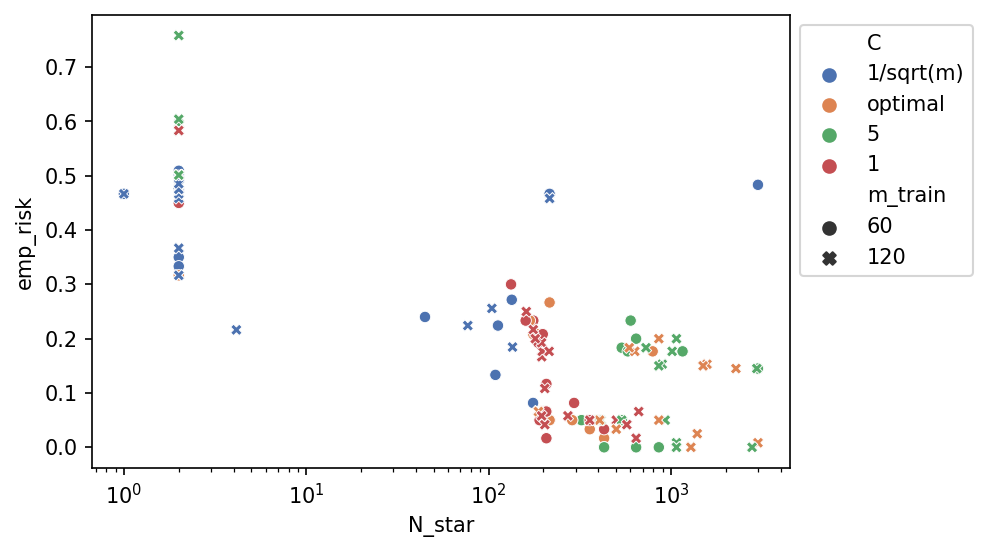

In [23]:
sns.scatterplot(data =  data,
x= "N_star", y="emp_risk", palette="deep", style = "m_train", hue =  "C", s = 30)
plt.xscale("log")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

In [10]:
data.xs(120, level = "m_train")

,,,N_star,emp_risk
"kernel,dataset",Remp_eps,C,,
"(Havliscek, Generated)","(margin, 0.5)",1/sqrt(m),216.000000,0.458333
"(QAOA, Checkerboard)","(margin, 0.5)",5,2.000000,0.583333
"(Circ-Hubr, Two_Moons)","(margin, 0.5)",5,1072.000000,0.200000
"(Havliscek, Checkerboard)","(relative, 0.05)",1/sqrt(m),2.000000,0.501250
"(QAOA, Generated)","(relative, 0.05)",1/sqrt(m),2.000000,0.485417
"(Havliscek, Two_Moons)","(margin, 0.5)",1/sqrt(m),2.000000,0.316667
"(Circ-Hubr, Two_Moons)","(relative, 0.05)",5,2957.000000,0.145000
"(QAOA, Two_Moons)","(margin, 0.5)",5,1072.000000,0.008333
"(Havliscek, Generated)","(relative, 0.05)",1/sqrt(m),2.000000,0.485417
